In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
E = np.eye(2)
W = np.random.uniform(size=(2,2))
#W = W.T @ W
W = W / np.linalg.norm(W,axis=0,keepdims=True) # unit length

In [3]:
l,v=np.linalg.eig(W) # returns eigenvalues and eigenvectors

In [4]:
# Definition of eigenvalues (l) and eigenvectors (v): W@v = l*v
W@v, l*v

(array([[ 1.04602665,  0.10672108],
        [ 0.93642382, -0.10800106]]),
 array([[ 1.04602665,  0.10672108],
        [ 0.93642382, -0.10800106]]))

In [5]:
E, W, l, v

(array([[1., 0.],
        [0., 1.]]),
 array([[0.6736836 , 0.81573405],
        [0.7390199 , 0.57842714]]),
 array([ 1.40394491, -0.15183418]),
 array([[ 0.74506246, -0.70287913],
        [ 0.6669947 ,  0.7113093 ]]))

In [6]:
def quiver2(X,Y,U,V,fig=None,ax=None,eps=0.05,angles='xy',scale_units='xy',scale=1,**kwargs):
    """
    Modifies matplotlib.pyplot.quiver to plot vectors based on 
    absolute scale, and scales axes appropriately.
    
    Parameters:
        X,Y,U,V (nvecs,): See matplotlib.pyplot.quiver for details. TLDR: 
                 origin and offset of vectors in x and y cardinal directions.
        fig,ax: matplotlib figure and axes
        eps (float): fraction of whitespace from bbox to vectors.
    """
    
    xmin = min(np.min(X),np.min(X+U))
    xmax = max(np.max(X),np.max(X+U))
    ymin = min(np.min(Y),np.min(Y+V))
    ymax = max(np.max(Y),np.max(Y+V))
    offsetx = max(abs(eps*xmin),abs(eps*xmax))
    offsety = max(abs(eps*ymin),abs(eps*ymax))
    if fig == None:
        fig,ax = plt.subplots()
    else:
        (xmin_b4,xmax_b4),(ymin_b4,ymax_b4) = ax.get_xlim(), ax.get_ylim()
        xmin = min(xmin, xmin_b4)
        xmax = max(xmax, xmax_b4)
        ymin = min(ymin, ymin_b4)
        ymax = max(ymax, ymax_b4)
    ax.quiver(X,Y,U,V,angles=angles,scale_units=scale_units,scale=scale,**kwargs)
    ax.set_xlim(xmin-offsetx,xmax+offsetx)
    ax.set_ylim(ymin-offsety,ymax+offsety)
    return fig,ax

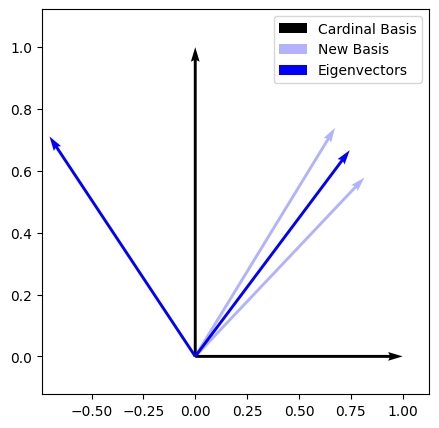

In [7]:
fig,ax=plt.subplots(figsize=(5,5))
quiver2(*np.zeros((2,2)),*E,fig,ax,angles='xy', scale_units='xy', scale=1,label="Cardinal Basis")
quiver2(*np.zeros((2,2)),*W,fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=0.3,label="New Basis")
#quiver2(*W,*(v-W),fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=0.6)#,label="test")
quiver2(*np.zeros((2,2)),*v,fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=1,label="Eigenvectors")
plt.legend()

In [8]:
rotmat_fn = lambda theta: np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
rotmat1 = rotmat_fn(1*np.pi/180)

In [9]:
# contiguous start vectors (in initial cardinal basis)
n = 361
vs = np.zeros((n,2))
vs[0,0] = 1 # start vector is along the cardinal x-direction
# new basis
us = vs.copy()
us[0] = rotmat1@vs[0]
for i in range(vs.shape[0]-1):
    vs[i+1] = rotmat1@vs[i]
    us[i+1] = W@vs[i+1]

In [10]:
v,l

(array([[ 0.74506246, -0.70287913],
        [ 0.6669947 ,  0.7113093 ]]),
 array([ 1.40394491, -0.15183418]))

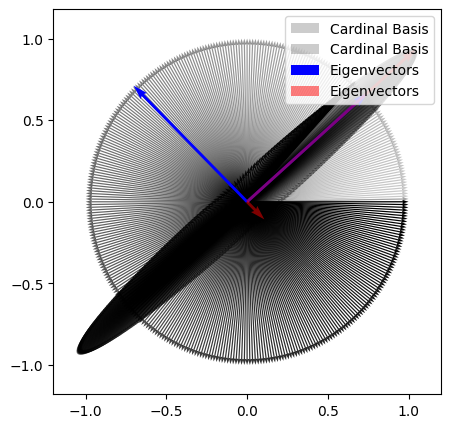

In [11]:
fig,ax=plt.subplots(figsize=(5,5))
quiver2(*np.zeros_like(vs).T,*vs.T,fig,ax,label="Cardinal Basis",alpha=np.linspace(0.2,1,n))
quiver2(*np.zeros_like(vs).T,*us.T,fig,ax,label="Cardinal Basis",alpha=np.linspace(0.2,1,n))
quiver2(*np.zeros((2,2)),*v,fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=1,label="Eigenvectors")
quiver2(*np.zeros((2,2)),*(v*l),fig,ax,angles='xy', scale_units='xy', scale=1,color="red", alpha=0.5,label="Eigenvectors")
plt.legend()

In [12]:
mesh = np.meshgrid(np.linspace(-1.5,1.5,15),np.linspace(-1.5,1.5,15))
mesh = np.array(mesh).reshape(2,-1).T
mesh.shape

(225, 2)

In [13]:
# constructing a pure rotation matrix (without reflection)
U,S,Vh = np.linalg.svd(W)
# Remove reflection: Ensure det(U) = 1 and det(Vh) = 1
if np.linalg.det(U) < 0:
    U[:, -1] *= -1  # Flip the last column of U
if np.linalg.det(Vh) < 0:
    Vh[-1, :] *= -1  # Flip the last row of Vh
# set singular values (sqrt of eigenvalues) to 1, creating an orthonormal basis (rotation matrix)
W_new = U @ Vh.T

In [19]:
l_new, v_new = np.linalg.eig(W_new)
# Eigenvalues and eigenvectors of W_new
# will be imaginary because W_new is a pure rotation matrix.
# Exceptions are when the rotation is by 0 (the identity matrix) or 180 degrees.
l_new, v_new

(array([0.00431772+0.99999068j, 0.00431772-0.99999068j]),
 array([[ 3.51275852e-17-0.70710678j,  3.51275852e-17+0.70710678j],
        [-7.07106781e-01+0.j        , -7.07106781e-01-0.j        ]]))

In [20]:
# A recursive application of W_new on v_new will result in a circular trajectory.
# And there are no fixed points, as this requires the eigenvector to be -1 or 1.
v_new, W_new @ v_new, W_new @ W_new @ v_new, W_new @ W_new @ W_new @ v_new

(array([[ 3.51275852e-17-0.70710678j,  3.51275852e-17+0.70710678j],
        [-7.07106781e-01+0.j        , -7.07106781e-01-0.j        ]]),
 array([[ 0.70710019-0.00305309j,  0.70710019+0.00305309j],
        [-0.00305309-0.70710019j, -0.00305309+0.70710019j]]),
 array([[0.00610613+0.70708042j, 0.00610613-0.70708042j],
        [0.70708042-0.00610613j, 0.70708042+0.00610613j]]),
 array([[-0.70704746+0.00915905j, -0.70704746-0.00915905j],
        [ 0.00915905+0.70704746j,  0.00915905-0.70704746j]]))

In [16]:
U,S,Vh = np.linalg.svd(W_new)
U@Vh.T

array([[ 0.00431772, -0.99999068],
       [ 0.99999068,  0.00431772]])

In [29]:
# construct matrix with one eigenvalue being 1 - this will result in a fixed point
eigvecs = np.random.uniform(size=(2,2)) 
eigvals = np.diag([1, np.random.uniform()])
W_mark = eigvecs @ eigvals @ np.linalg.inv(eigvecs)

In [35]:
# Recursive application of W_mark on eigvecs will result in a fixed point at the eigenvector 
# corresponding to eigenvalue 1 (i.e. the first column of eigvecs)
eigvecs, W_mark @ eigvecs, W_mark @ W_mark @ eigvecs, W_mark @ W_mark @ W_mark @ eigvecs

(array([[0.59589068, 0.93960541],
        [0.0253455 , 0.33687566]]),
 array([[0.59589068, 0.09974557],
        [0.0253455 , 0.03576167]]),
 array([[0.59589068, 0.01058868],
        [0.0253455 , 0.00379635]]),
 array([[5.95890676e-01, 1.12406101e-03],
        [2.53455044e-02, 4.03008316e-04]]))

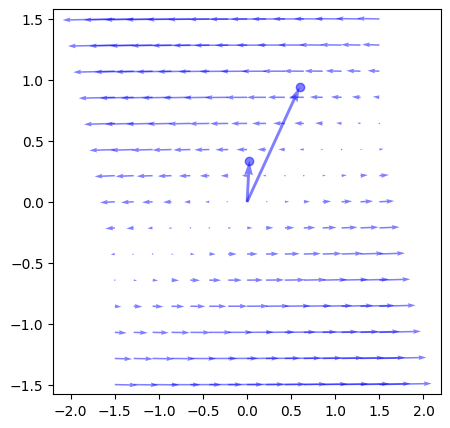

In [36]:
dt = 0.1
vec = (W_mark@mesh.T) * dt
fig,ax=plt.subplots(figsize=(5,5))
quiver2(*np.zeros((2,2)),*eigvecs.T,fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=0.5,label="Eigenvectors")
quiver2(*mesh.T,*vec,fig,ax,angles='xy', scale_units='xy', scale=1,color="blue", alpha=0.5)
plt.scatter(*eigvecs.T, color="blue", alpha=0.5)

In [173]:
# x + dx/dt = x + Wx*dt